In [1]:
%cd ..
import DL_Layer_Analysis
%cd examples

/home/ido/projects/SparsityProbe
/home/ido/projects/SparsityProbe/examples


# Computing $\alpha$-Scores on CIFAR10 Dataset
In this example, we will show how to compute the $\alpha$-scores on a trained CIFAR10 network. 
We use a Resnet18 trained on CIFAR10. 
Pretrained Resnet18 taken from https://github.com/huyvnphan/PyTorch_CIFAR10 **(Check it out!)**. 



In [2]:
from DL_Layer_Analysis.clustering import *
from DL_Layer_Analysis.DL_smoothness import *
from utils.utils import *
import pickle
loaded_example_args = pickle.load(open(os.path.join('cifar10', 'args.p'), "rb"))
%matplotlib inline

## Loading params for Smoothness Script

In [3]:
'''print saved args'''
loaded_example_args

Namespace(batch_size=1024, calc_test=True, checkpoint_path=None, checkpoints_folder='cifar10/outputs', depth=20, env_name='cifar10_env', epsilon_1=0.1, feature_dimension=100000, feature_dimenstion=1000, low_range_epsilon=0.4, output_folder='cifar10/outputs', seed=1079, trees=5, use_clustering=False)

In [4]:
'''init number of trees, epsilons, and dim reduction threshold'''
loaded_example_args.trees = 5
loaded_example_args.epsilon_1 = 0.1
loaded_example_args.epsilon_2 = 0.4
loaded_example_args.seed = 1079
loaded_example_args.feature_dimension = 1000

## Fetching the Loaders, Datasets, and Layers
Following the **env_name** arg, the datasets, model, and model layers are loaded. For more on this, check out **environements/cifar10_env.py**. 

In [5]:
'''init the model, along with the test loader, and layers to run analysis on'''
args, model, dataset, test_dataset, layers, data_loader =  init_params(args=loaded_example_args)

Namespace(batch_size=1024, calc_test=True, checkpoint_path=None, checkpoints_folder='cifar10/outputs', depth=20, env_name='cifar10_env', epsilon_1=0.1, epsilon_2=0.4, feature_dimension=1000, feature_dimenstion=1000, low_range_epsilon=0.4, output_folder='cifar10/outputs', seed=1079, trees=5, use_clustering=False, use_cuda=True)
Files already downloaded and verified
Files already downloaded and verified


In [6]:
'''outputs written to...'''
loaded_example_args.output_folder

'cifar10/outputs'

## Running Sparsity Probe on all given layers

  2%|▏         | 1/49 [00:00<00:05,  9.55it/s]

There are 8 layers!
LAYER -1, type:layer


100%|██████████| 49/49 [00:05<00:00,  9.60it/s]


computing TruncatedSVD, X:torch.Size([50000, 3072]), output_dimension:1000
TruncatedSVD took 26.45781946182251
X.shape:(50000, 1000), Y shape:(50000, 1)
building tree 1 of 5building tree 2 of 5

building tree 3 of 5building tree 4 of 5

building tree 5 of 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   35.5s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.1s finished
100%|██████████| 170/170 [00:00<00:00, 673.92it/s]


ALPHA for LAYER -1 is 0.15076959292991607
Fitting k means with k=10
START clustering statistics
DONE clustering statistics
adj_rand:0.04063624023526627
MI_score:0.07697876636894073
homogeneity_score:0.07673375333637594
completeness:0.07788690615803691
FMI:0.13971997823187632
Fitting umap


  0%|          | 0/49 [00:00<?, ?it/s]

Done fitting umap
layers: 4 2 1
LAYER 0, type:layer


100%|██████████| 49/49 [00:06<00:00,  7.80it/s]


computing TruncatedSVD, X:(50000, 16384), output_dimension:1000
TruncatedSVD took 116.06035876274109
after dim reduction
X.shape:(50000, 1000), Y shape:(50000, 1)
building tree 1 of 5
building tree 2 of 5building tree 3 of 5
building tree 4 of 5

building tree 5 of 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


KeyboardInterrupt: 

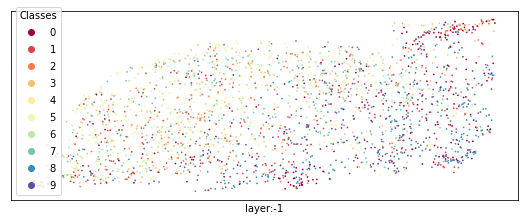

<Figure size 576x432 with 0 Axes>

In [7]:
'''run sparsity analysis algorithm with given arguments'''
# only_umap used when we only want the visualization
args.only_umap = False
# When we want to comapre to clustering metrics, use args.use_clustering = True
args.use_clustering = True
# Run sparsity on the CIFAR10 pretrained example
sparsity_run_output = run_smoothness_analysis(args, model, dataset, test_dataset, layers, data_loader)

## Plotting the $\alpha$-Scores vs. Clustering Metrics

In [ ]:
from DL_Layer_Analysis.plot_DL_json_results import plot_layers
# Plot alpha smoothness through the pochs, and compare to clustering scores
plot_layers(args.checkpoints_folder, plot_test=True, add_fill=False, use_clustering=True)